## 積算雨量の時系列を描画する（5本の線）
* 事前に作成した積算雨量(TPA)のNetCDFファイルを読み込み、時系列を描画する
* 事前に を実行し、CReSSの1分間雨量を積算してTPAを計算

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shapereader
import xarray as xr
import metpy
from metpy.units import units
import metpy.calc as mpcalc
#from mpl_toolkits.basemap import cm
import sys # to get argv
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
p1   = xr.open_dataset(f'../data/cress/TPA_AW-H.nc')["TPA"]
p12  = xr.open_dataset(f'../data/cress/TPA_AW-H2.nc')["TPA"]
p2   = xr.open_dataset(f'../data/cress/TPA_AVW-H.nc')["TPA"]
p3   = xr.open_dataset(f'../data/cress/TPA_AVW-H-LNA.nc')["TPA"]
p4   = xr.open_dataset(f'../data/cress/TPA_AVW-H-LKO.nc')["TPA"]

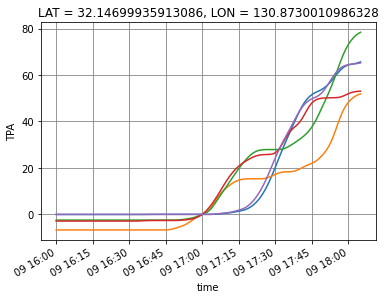

In [5]:
t0 = "2021-07-09T16:00" # 16:05 UTC = 01:05 JST
t1 = "2021-07-09T16:05" # 16:05 UTC = 01:05 JST
tm = "2021-07-09T17:00" # 17:00 UTC = 02:00 JST
t2 = "2021-07-09T18:00" # 18:00 UTC = 03:00 JST

p1.plot()
p12.plot()
p2.plot()
p3.plot()
p4.plot()
#p1.sel(TIME=slice(tm, t2)).plot()

plt.grid(which='major',color='gray',linestyle='-')

fig_tpa4.png


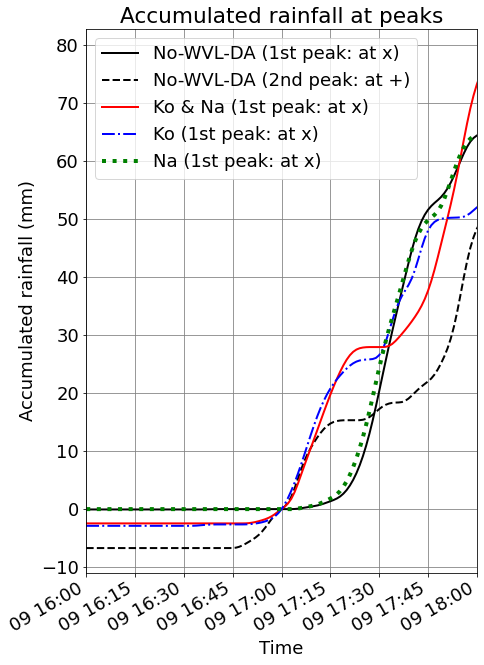

In [6]:
#---図の設定-------------
fs = 18
plt.rcParams["font.size"]   = fs
#plt.rcParams["font.family"] = "fontname"

#---プロット領域の作成-----------
#fig = plt.figure()
#fig = plt.figure(figsize=(8,8))
fig = plt.figure(figsize=(7,10))

ax = fig.add_subplot(1, 1, 1)

#---lineを描く-------------------
# ax を使わない場合
#qv_cut.plot.line(y="LEV", aspect=0.75, size=8, color='black', marker='o')

# ax を使う場合
#  * ax を定義しておけば、軸が異なるxarrayでも適切にプロットできる
ta = '1st peak: at x'
tb = '2nd peak: at +'
p1.plot.line( ax=ax, color='black', lw=2, ls='-',  label=f'No-WVL-DA ({ta})')#, marker='o')
p12.plot.line(ax=ax, color='black', lw=2, ls='--', label=f'No-WVL-DA ({tb})')#, marker='o')
p2.plot.line( ax=ax, color='red',   lw=2, ls='-',  label=f'Ko & Na ({ta})')#, marker='o')
p3.plot.line( ax=ax, color='blue',   lw=2, ls='-.', label=f'Ko ({ta})')#, marker='o')
p4.plot.line( ax=ax, color='green', lw=4, ls=':',  label=f'Na ({ta})')#, marker='o')

plt.title("Accumulated rainfall at peaks")
plt.ylabel("Accumulated rainfall (mm)")
plt.xlabel("Time")
plt.grid(which='major',color='gray',linestyle='-')

#t2 = "2021-07-09T17:59" # 17:59 UTC = 02:59 JST

tt0 = pd.to_datetime(t0)
tt2 = pd.to_datetime(t2)
ax.set_xlim([tt0,tt2])
#ax.set_ylim([zmin,zmax])
plt.legend(prop={"size": 18}, loc="best")
#plt.yticks([0,10,20])
plt.yticks(np.arange(-10, 81, 10))

#------------------------------------
# 図のファイルへの書き出し
#from pathlib import Path
#exe = Path().resolve().split(".")[0] #.replace("draw", "")
#exe = os.path.basename(__file__).split(".")[0] #.replace("draw", "")
fig_name = "fig_tpa4.png"
#fig_name = "fig_" + exe + ".png"
print(fig_name)
plt.savefig(fig_name, dpi=300, bbox_inches='tight')
plt.show()